In [1]:
import matplotlib.pyplot as plt
# The line below allows to print all the outputs of a cell instead of only the last one
%config InteractiveShell.ast_node_interactivity = "all"
import numpy as np
import os
import pandas as pd
# noinspection PyPackageRequirements
# noinspection PyPackageRequirements
import seaborn as sns
import sys
# noinspection PyPackageRequirements

import yaml
import pickle
import pathlib

In [4]:
from_script = False

print(f"WARNING: This notebook is set with from_script = {from_script}.")

if from_script:
    # Get the path of the notebook config file from the environment variable
    path_config_notebook = os.environ["PATH_YAML_CONFIG"]
    # Load the notebook config file
    with open(path_config_notebook, "r") as file:
        dict_config_notebook = yaml.safe_load(file)
    id_xp = dict_config_notebook["id_xp"]
    path_project = pathlib.Path(dict_config_notebook["path_project"])
else:
    id_xp = 21
    path_project = pathlib.Path("/home/hosseinkhan/Documents/work/phd/git_repositories/doe4rl")

# Add the path of the project to the sys.path in order to import the modules in the src folder
sys.path.insert(0, os.path.abspath(path_project))

# Define the paths
path_mlruns = pathlib.Path(f"{path_project}/experiments/mlruns")
path_experiment = pathlib.Path(f"{path_mlruns}/{id_xp}")
# Get all folder in the mlruns/id_xp directory except the folder 'tags' using pathlib and iter dir
list_id_hash = [path.name for path in path_experiment.iterdir() if path.is_dir() and path.name != "tags"]

print(f"Number of runs: {len(list_id_hash)} \n")
print(f"XP id: {id_xp} \n")

nested_dict_config = {}
list_df_config_flattened = []
# Verify all experiments are done on the same environment:
path_xp = f"{path_mlruns}/{id_xp}"
for name_id in list_id_hash:
    list_glob_config = list(pathlib.Path(f"{path_xp}/{name_id}/artifacts/hydra_config").glob("./*/.hydra/config.yaml"))
    assert len(list_glob_config) == 1, "More than one config file in the directory."

    name_config_file = list_glob_config[0].name
    # Check if the file is a yaml file
    assert name_config_file.endswith(".yaml"), "File is not a yaml file."

    path_run_config_yaml = list_glob_config[0]
    with open(path_run_config_yaml, "r") as file:
        # Get the config file as a dictionary
        dict_config_temp = yaml.safe_load(file)
        # Add the config file to the nested dictionary
        nested_dict_config[name_id] = dict_config_temp
        # Flatten the config file for easier check
        list_df_config_flattened.append(pd.json_normalize(dict_config_temp, sep="_"))
    del dict_config_temp

# Check afterwards if all the configurations are the same
set_expected_nonunique_keys = {"alg_num_iters",
                               "crop_to_domain",
                               "project_to_domain",
                               "alg_n_semimarkov_dt",
                               "seed",
                               "name"}

set_nonunique_keys = set(pd.concat(list_df_config_flattened)
                         .astype(str)
                         .nunique()
                         .loc[lambda x: x > 1]
                         .to_dict()
                         .keys())

print(f"Set of non unique keys: {set_nonunique_keys} \n")

# Check if the configurations are the same inter runs
bool_similar_configs = set_nonunique_keys.issubset(set_expected_nonunique_keys)
assert bool_similar_configs, "The configurations are not the same."

# Pretty print the first config file
print(f"First config file: {list_id_hash[0]} \n")
print(yaml.dump(nested_dict_config[list_id_hash[0]], sort_keys=False))

Number of runs: 30 

XP id: 21 
Set of non unique keys: {'project_to_domain', 'alg_n_semimarkov_dt', 'seed'} 

First config file: 8e229eb80d9f47b9a1b9b4f975554904 

name: 2023_12_01_lorenz_new
num_eval_trials: 5
eval_frequency: 1
resume: false
env:
  teleport: false
  normalize_env: true
  sample_exe: false
  gp:
    periodic: false
    opt_max_iter: 10
    ls:
    - - 0.17
      - 2.08
      - 7.16
      - 82.55
      - 42.86
      - 13.4
    - - 0.26
      - 1.61
      - 2.09
      - 84.71
      - 94.44
      - 91.4
    - - 0.09
      - 2.53
      - 0.72
      - 87.77
      - 35.5
      - 79.94
    alpha:
    - 12.23
    - 10.14
    - 6.57
    sigma: 0.0011
  tf_precision: 64
  name: lorenz-new-v0
  mpc:
    nsamps: 25
    planning_horizon: 2
    n_elites: 1
    beta: 3
    gamma: 1.25
    xi: 0.3
    num_iters: 1
    actions_per_plan: 1
  eigmpc:
    nsamps: 25
    planning_horizon: 2
    n_elites: 1
    beta: 3
    gamma: 1.25
    xi: 0.3
    num_iters: 1
    actions_per_plan: 1
  

In [5]:
(pd.concat(list_df_config_flattened, keys=list_id_hash)
 .astype(str)
 .groupby(["seed", "alg_n_semimarkov_dt"])
 .nunique())

name  num_eval_trials  eval_frequency  resume  \
seed alg_n_semimarkov_dt                                                  
0    1                       1                1               1       1   
     2                       1                1               1       1   
     4                       1                1               1       1   
1    1                       1                1               1       1   
     2                       1                1               1       1   
     4                       1                1               1       1   
2    1                       1                1               1       1   
     2                       1                1               1       1   
3    1                       1                1               1       1   
     2                       1                1               1       1   
     4                       1                1               1       1   
4    1                       1                1               1       1   
     4                       1                1               1       1   

                          num_iters  eval_bayes_policy  fixed_start_obs  \
seed alg_n_semimarkov_dt                                                  
0    1                            1                  1                1   
     2                            1                  1                1   
     4                            1                  1                1   
1    1                            1                  1                1   
     2                            1                  1                1   
     4                            1                  1                1   
2    1                            1                  1                1   
     2                            1                  1                1   
3    1                            1                  1                1   
     2                            1                  1                1   
     4                            1                  1                1   
4    1                            1                  1                1   
     4                            1                  1                1   

                          num_samples_mc  num_init_data  test_set_size  ...  \
seed alg_n_semimarkov_dt                                                ...   
0    1                                 1              1              1  ...   
     2                                 1              1              1  ...   
     4                                 1              1              1  ...   
1    1                                 1              1              1  ...   
     2                                 1              1              1  ...   
     4                                 1              1              1  ...   
2    1                                 1              1              1  ...   
     2                                 1              1              1  ...   
3    1                                 1              1              1  ...   
     2                                 1              1              1  ...   
     4                                 1              1              1  ...   
4    1                                 1              1              1  ...   
     4                                 1              1              1  ...   

                          eigmpc_actions_per_plan  test_mpc_nsamps  \
seed alg_n_semimarkov_dt                                             
0    1                                          1                1   
     2                                          1                1   
     4                                          1                1   
1    1                                          1                1   
     2                                          1                1   
     4                                          1                1   
2    1                      

In [6]:
list_name_columns_learning = ["Acquisition Function Value",
                              "Eval Returns",
                              "Eval ndata",
                              "mean_difference_state_boostrap",
                              "n_corresponding_dt",
                              "Model MSE (current real MPC)",
                              "Model MSE (random test set)",
                              "Model MSE (GT MPC)",
                              "Model Likelihood (random test set)",
                              "Model Likelihood (GT MPC)", ]

dict_columns_learning_renaming_map = {"Acquisition Function Value": "eig",
                                      "Eval Returns": "eval_returns",
                                      "Eval ndata": "eval_ndata",
                                      "mean_difference_state_boostrap": "mean_difference_state_bootstrap",
                                      "Model MSE (current real MPC)": "model_mse_current_real_mpc",
                                      "Model MSE (random test set)": "model_mse_random_test_set",
                                      "Model MSE (GT MPC)": "model_mse_gt_mpc",
                                      "Model Likelihood (random test set)": "model_likelihood_random_test_set",
                                      "Model Likelihood (GT MPC)": "model_likelihood_gt_mpc", }

# Load each of the runs data
list_df_learning_data = []

for name_id in list_id_hash:
    path_pickle_data = f"{path_experiment}/{name_id}/barl_data/info.pkl"
    # list(path_experiment.iterdir())[0]

    # Load the data
    with open(path_pickle_data, "rb") as file:
        dict_data = pickle.load(file)

    df_learning_data_temp = (
        pd.DataFrame({name_columns: dict_data[name_columns] for name_columns in list_name_columns_learning})
        .explode("Eval Returns")
        .reset_index(names=["iteration"])
        .rename(columns=dict_columns_learning_renaming_map)
    )

    list_df_learning_data.append(df_learning_data_temp)

In [7]:
# Get the list of the delay mode
list_action_delay_mode = [nested_dict_config[name_id]["alg"]["n_semimarkov_dt"]
                          for name_id in list_id_hash]

list_project_to_domain = [nested_dict_config[name_id]["project_to_domain"]
                          for name_id in list_id_hash]

list_keys_tuple_id_action_delay_mode = [(run_id, action_delay_mode, project_to_domain)
                                        for run_id, action_delay_mode, project_to_domain
                                        in zip(list_id_hash, list_action_delay_mode, list_project_to_domain)]

df_learning_data = pd.concat(list_df_learning_data, keys=list_keys_tuple_id_action_delay_mode,
                             names=["run_id", "action_delay_mode", "project_to_domain"])

In [8]:
df_learning_data.describe()

iteration           eig    eval_ndata  \
count  15000.000000  15000.000000  15000.000000   
mean      49.500000      3.490337     50.500000   
std       28.867032      1.993045     28.867032   
min        0.000000      0.475405      1.000000   
25%       24.750000      2.509153     25.750000   
50%       49.500000      3.256159     50.500000   
75%       74.250000      3.985157     75.250000   
max       99.000000     19.842289    100.000000   

       mean_difference_state_bootstrap  n_corresponding_dt  \
count                     1.500000e+04         15000.00000   
mean                      3.936233e-02             1.79000   
std                       1.802860e-01             1.07268   
min                       0.000000e+00             1.00000   
25%                       9.251859e-18             1.00000   
50%                       5.551115e-17             1.00000   
75%                       1.493932e-03             2.00000   
max                       1.184241e+00             4.00000   

       model_mse_current_real_mpc  model_mse_random_test_set  \
count                1.500000e+04               15000.000000   
mean                 1.929821e-03                  53.228138   
std                  4.300420e-03                   5.999386   
min                  1.866984e-08                  41.030228   
25%                  4.021245e-06                  50.970924   
50%                  1.487361e-04                  54.470536   
75%                  1.760346e-03                  56.230400   
max                  7.322410e-02                  62.389139   

       model_mse_gt_mpc  model_likelihood_random_test_set  \
count      1.500000e+04                      15000.000000   
mean       1.173452e-03                         -5.789649   
std        3.353534e-03                          0.314366   
min        5.994237e-08                         -6.299181   
25%        4.170325e-06                         -5.926935   
50%        1.172049e-04                         -5.870381   
75%        7.506154e-04                         -5.673555   
max        5.108945e-02                         -5.206592   

       model_likelihood_gt_mpc  
count             15000.000000  
mean                 -2.757641  
std                   0.001397  
min                  -2.770494  
25%                  -2.757682  
50%                  -2.757076  
75%                  -2.756892  
max                  -2.756828

##### Check DataFrame plot format

In [9]:
n_eval_trajectory = nested_dict_config[list_id_hash[0]]["num_eval_trials"]

(df_learning_data
 .reset_index(level=-1)
 .assign(trajectory_id=lambda df: df["level_3"] % n_eval_trajectory)
 .drop(columns=["level_3"]))

iteration  \
run_id                           action_delay_mode project_to_domain              
8e229eb80d9f47b9a1b9b4f975554904 1                 False                      0   
                                                   False                      0   
                                                   False                      0   
                                                   False                      0   
                                                   False                      0   
...                                                                         ...   
452f7b0bf4544b1a944c4be57cfcf75f 1                 False                     99   
                                                   False                     99   
                                                   False                     99   
                                                   False                     99   
                                                   False                     99   

                                                                           eig  \
run_id                           action_delay_mode project_to_domain             
8e229eb80d9f47b9a1b9b4f975554904 1                 False              2.693347   
                                                   False              2.693347   
                                                   False              2.693347   
                                                   False              2.693347   
                                                   False              2.693347   
...                                                                        ...   
452f7b0bf4544b1a944c4be57cfcf75f 1                 False              1.231130   
                                                   False              1.231130   
                                                   False              1.231130   
                                                   False              1.231130   
                                                   False              1.231130   

                                                                       eval_returns  \
run_id                           action_delay_mode project_to_domain                  
8e229eb80d9f47b9a1b9b4f975554904 1                 False             -153690.494953   
                                                   False              -153767.53027   
                                                   False             -153469.852726   
                                                   False             -154086.929945   
                                                   False             -155124.781859   
...                                                                             ...   
452f7b0bf4544b1a944c4be57cfcf75f 1                 False              -64790.888553   
                                                   False              -32383.498274   
                                                   False              -44124.075886   
                                                   False              -83900.567456   
                                                   False              -44901.900764   

                                                                      eval_ndata  \
run_id                           action_delay_mode project_to_domain               
8e229eb80d9f47b9a1b9b4f975554904 1                 False                     1.0   
                                                   False                     1.0   
                                                   False                     1.0   
                                                   False                     1.0   
                                                   False                     1.0   
...                                                                          ...   
452f7b0bf4544b1a944c4be57cfcf75f 1                 False                   100.0   
                                   

================== eig ==================


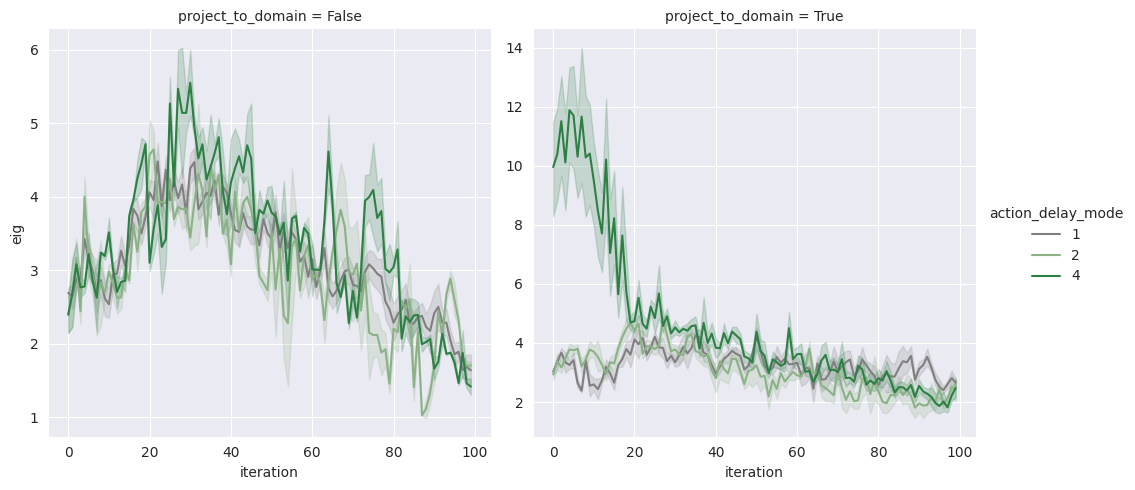

================== eval_returns ==================


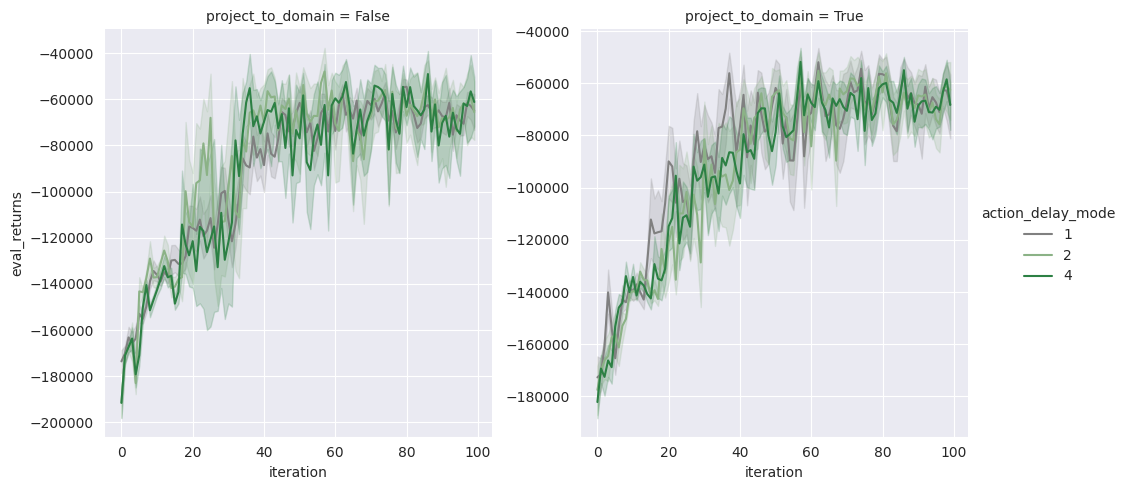

================== mean_difference_state_bootstrap ==================


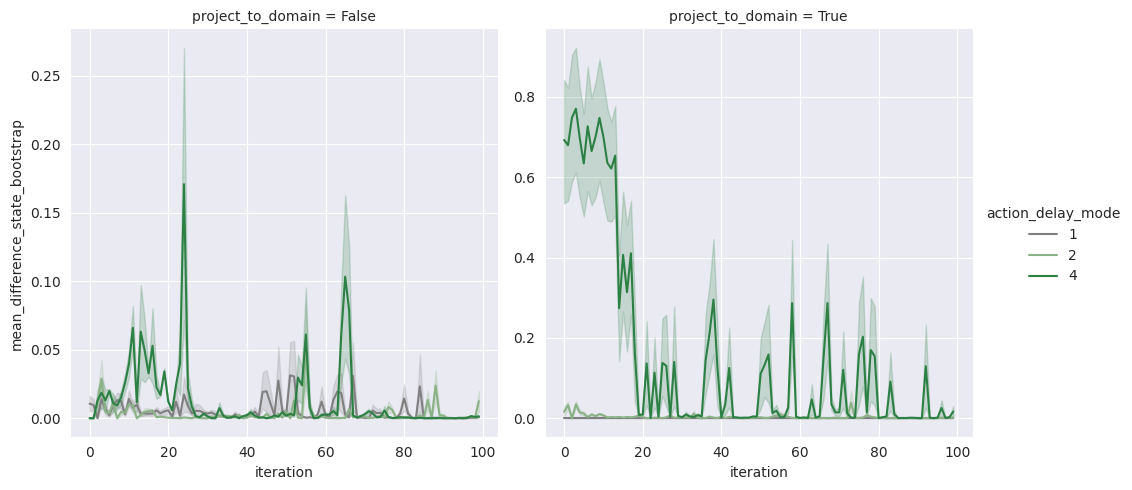

================== n_corresponding_dt ==================


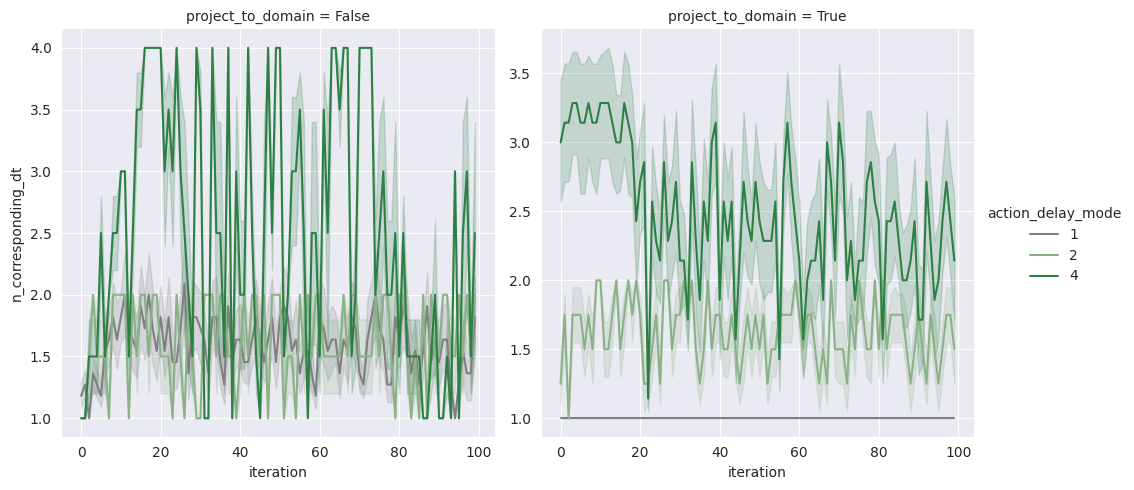

================== model_mse_current_real_mpc ==================


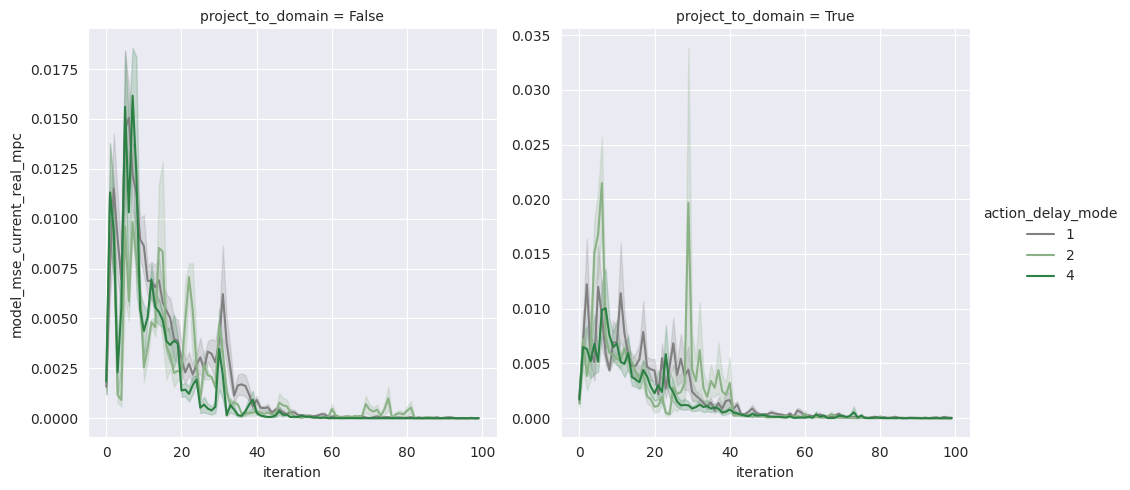

================== model_mse_random_test_set ==================


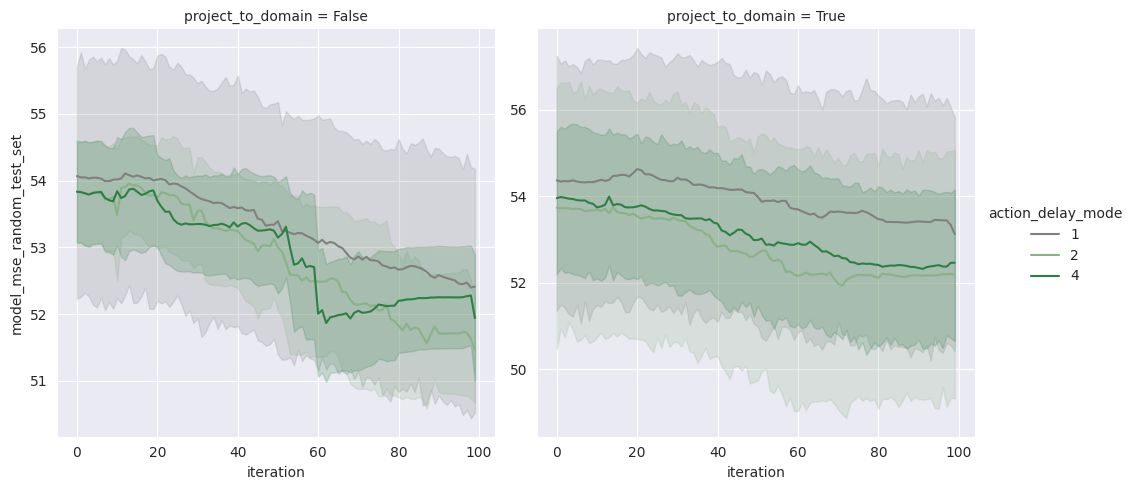

================== model_mse_gt_mpc ==================


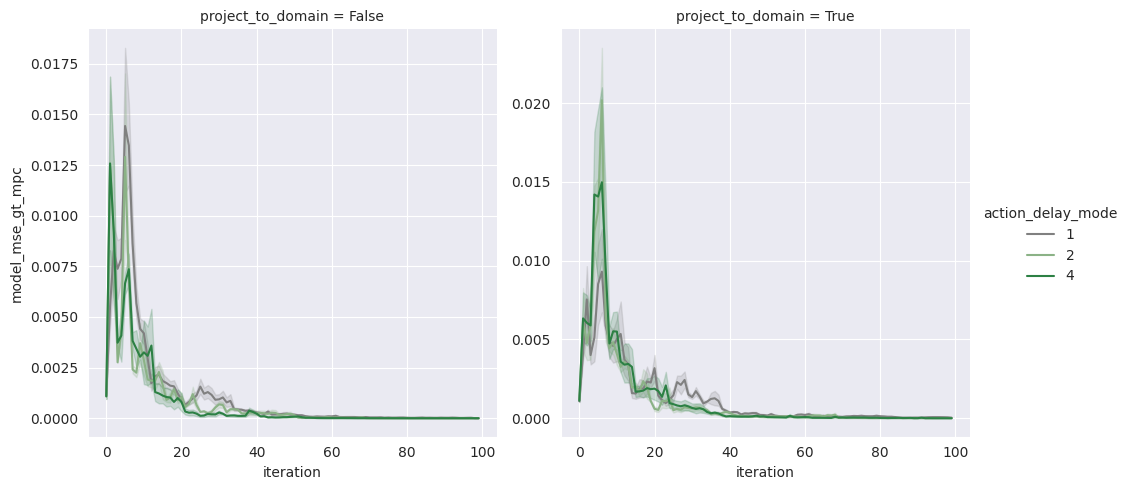

================== model_likelihood_random_test_set ==================


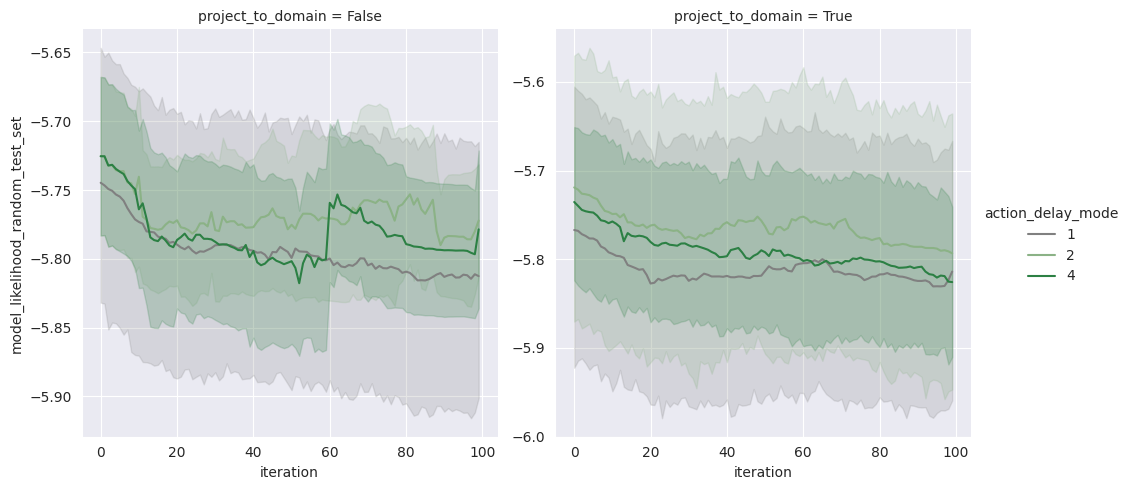

================== model_likelihood_gt_mpc ==================


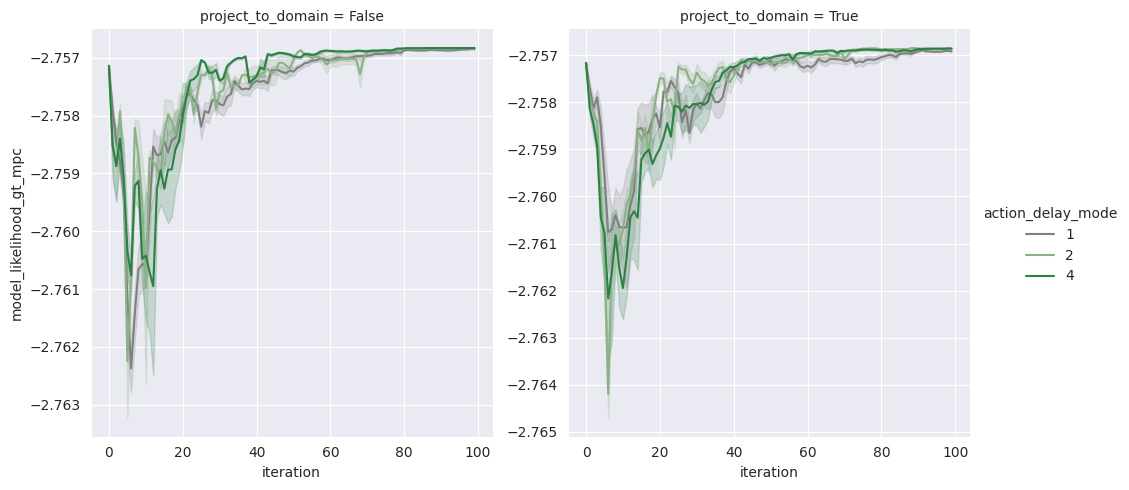

================== eval_ndata ==================


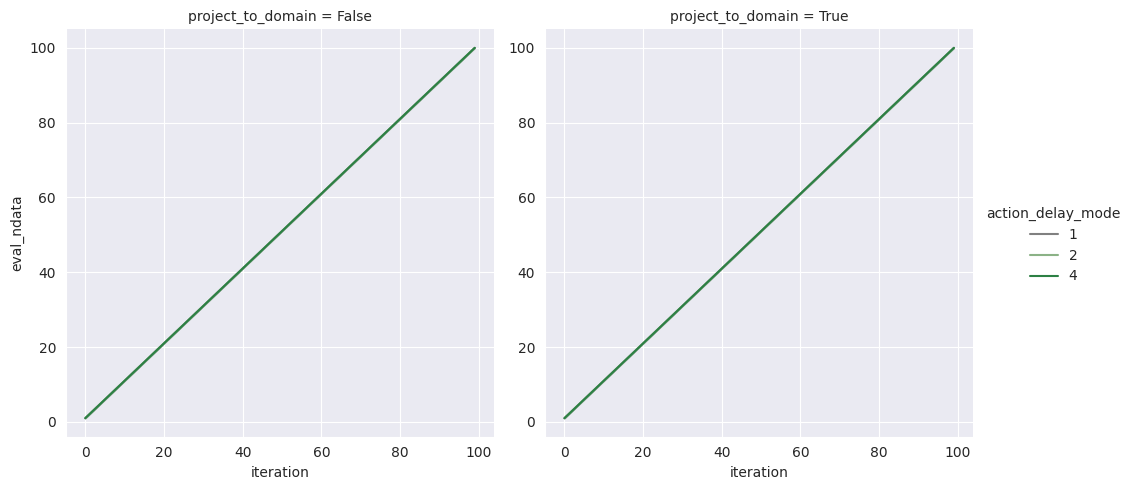

In [10]:
# Generate color palette with the first control experiment (no delay) being black while the others are Green but quite dark to be able to distinguish them
sns_other_palette = sns.color_palette("Greens", len(set(list_action_delay_mode)) - 1)
# Increase darkness of all colors in palette
coeff_darkness = 0.8
sns_other_palette = sns.color_palette([tuple(coeff_darkness * np.array(color)) for color in sns_other_palette])
list_color_palette = ["Grey"] + sns_other_palette
# list_color_palette = ["black"] + sns.color_palette("Greens", len(list_action_delay_mode) - 1).as_hex()
df_plot = df_learning_data.reset_index()

list_columns_plot = ["eig", "eval_returns", "mean_difference_state_bootstrap", "n_corresponding_dt",
                     "model_mse_current_real_mpc", "model_mse_random_test_set",
                     "model_mse_gt_mpc", "model_likelihood_random_test_set", "model_likelihood_gt_mpc", "eval_ndata"]

plt.close()
for name_column in list_columns_plot:
    print(f"================== {name_column} ==================")
    g = sns.relplot(data=df_plot,
                    x="iteration",
                    y=name_column,
                    hue="action_delay_mode",
                    col="project_to_domain",
                    kind="line",
                    # no sharing of y axis rowwise
                    facet_kws=dict(sharey=False),
                    palette=list_color_palette,
                    )
    plt.show()
    # Save the   figure
    # g.figure.savefig(f"/home/hosseinkhan/Downloads/temp_imgs/{name_column}.png")
    # plt.close()

================== eig ==================


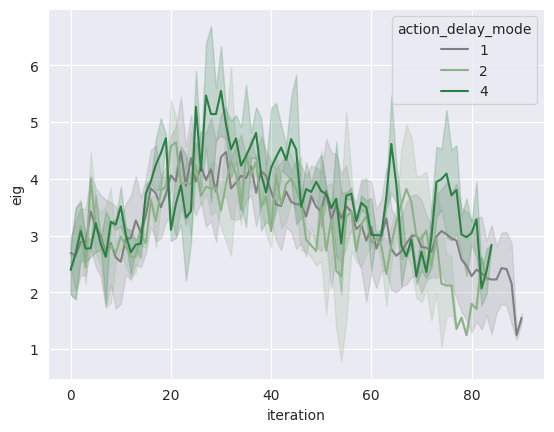

================== eval_returns ==================


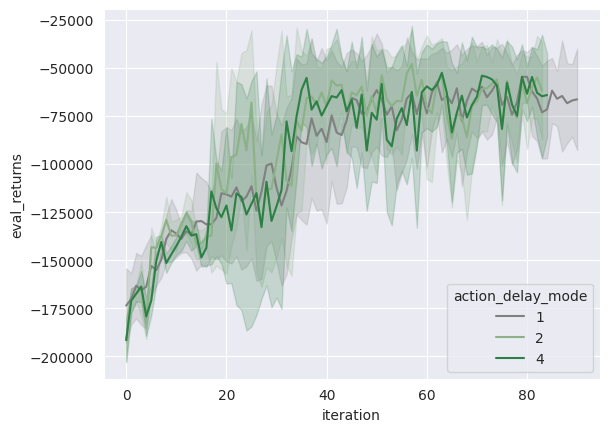

================== mean_difference_state_bootstrap ==================


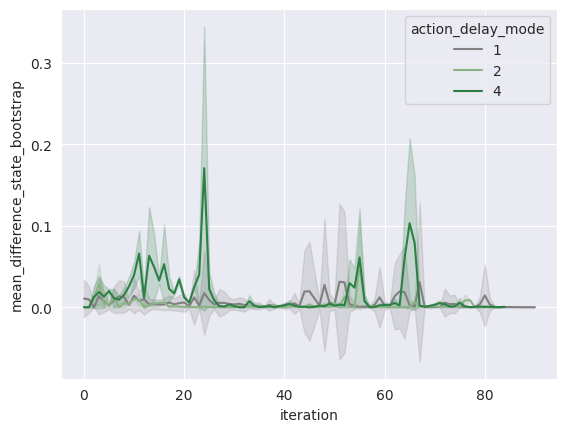

================== n_corresponding_dt ==================


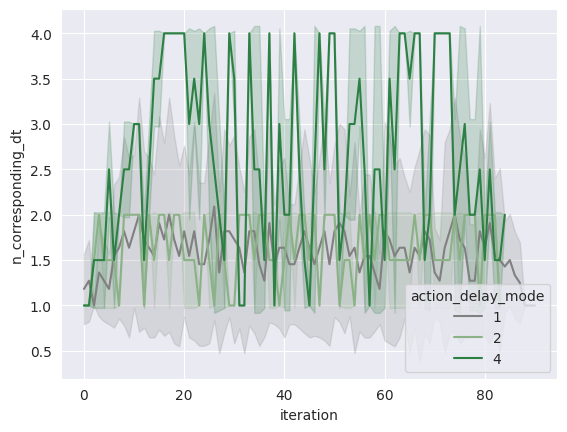

================== model_mse_current_real_mpc ==================


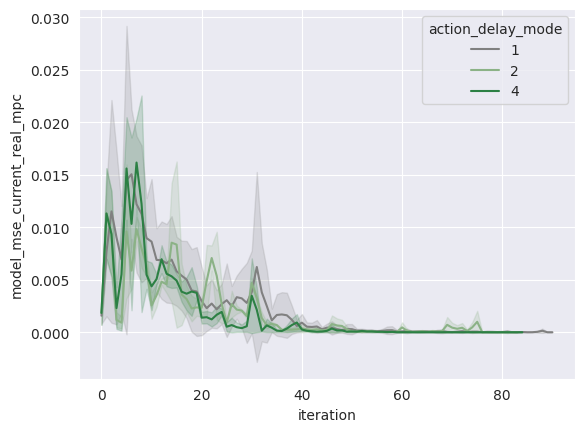

================== model_mse_random_test_set ==================


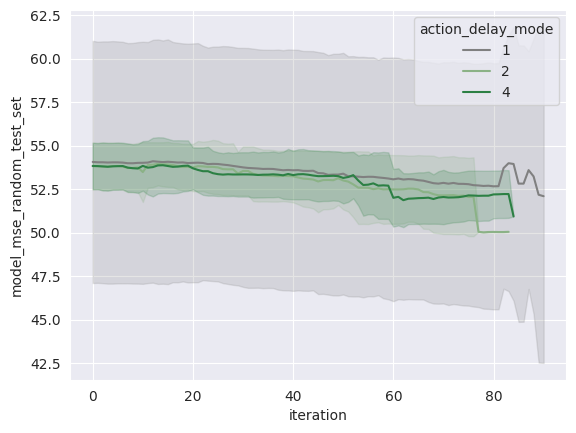

================== model_mse_gt_mpc ==================


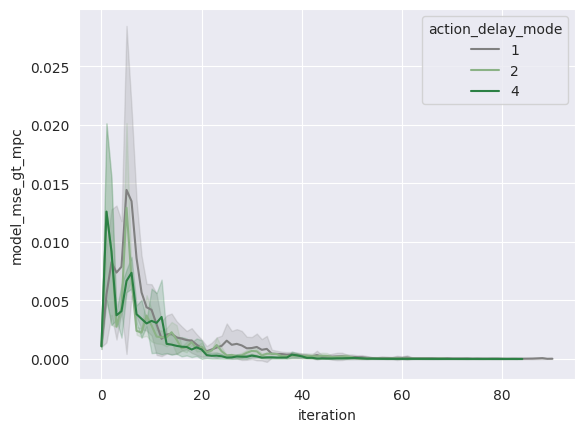

================== model_likelihood_random_test_set ==================


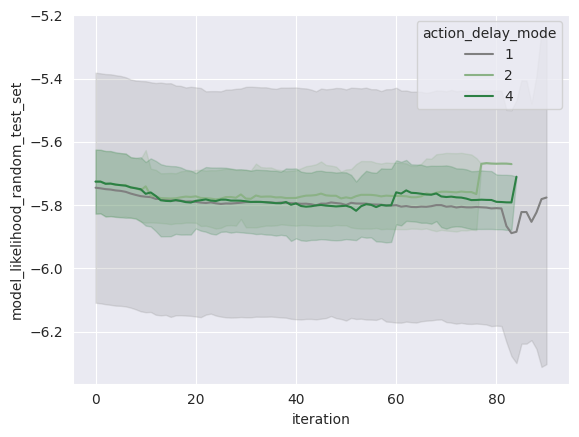

================== model_likelihood_gt_mpc ==================


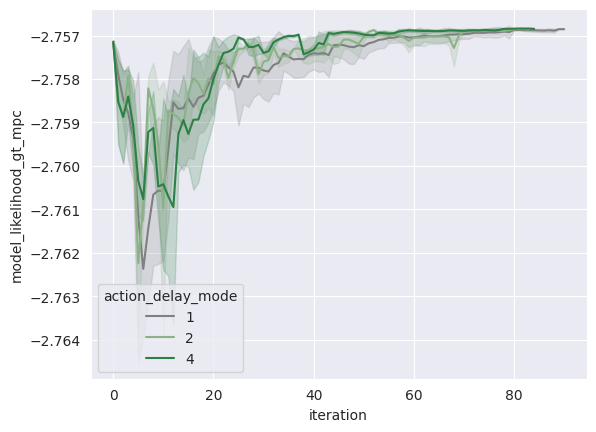

================== eval_ndata ==================


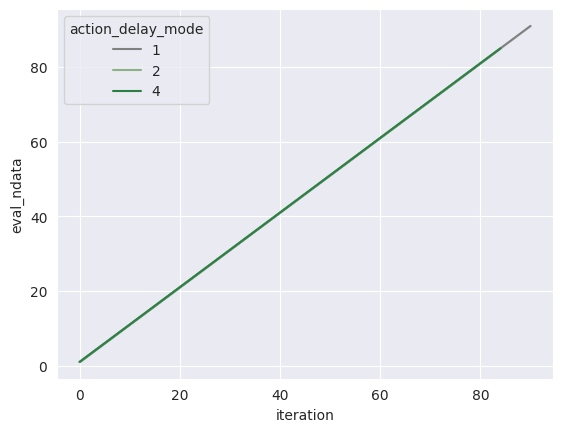

In [55]:
# Generate color palette with the first control experiment (no delay) being black while the others are Green but quite dark to be able to distinguish them
sns_other_palette = sns.color_palette("Greens", len(set(list_action_delay_mode)) - 1)
# Increase darkness of all colors in palette
coeff_darkness = 0.8
sns_other_palette = sns.color_palette([tuple(coeff_darkness * np.array(color)) for color in sns_other_palette])
list_color_palette = ["Grey"] + sns_other_palette
# list_color_palette = ["black"] + sns.color_palette("Greens", len(list_action_delay_mode) - 1).as_hex()
df_plot = df_learning_data.reset_index()

list_columns_plot = ["eig", "eval_returns", "mean_difference_state_bootstrap", "n_corresponding_dt",
                     "model_mse_current_real_mpc", "model_mse_random_test_set",
                     "model_mse_gt_mpc", "model_likelihood_random_test_set", "model_likelihood_gt_mpc", "eval_ndata"]

plt.close()
for name_column in list_columns_plot:
    print(f"================== {name_column} ==================")
    g = sns.lineplot(data=df_plot,
                     x="iteration",
                     y=name_column,
                     hue="action_delay_mode",
                     errorbar="sd",
                     legend="full",
                     palette=list_color_palette)
    plt.show()
    # Save the   figure
    # g.figure.savefig(f"/home/hosseinkhan/Downloads/temp_imgs/{name_column}.png")
    # plt.close()

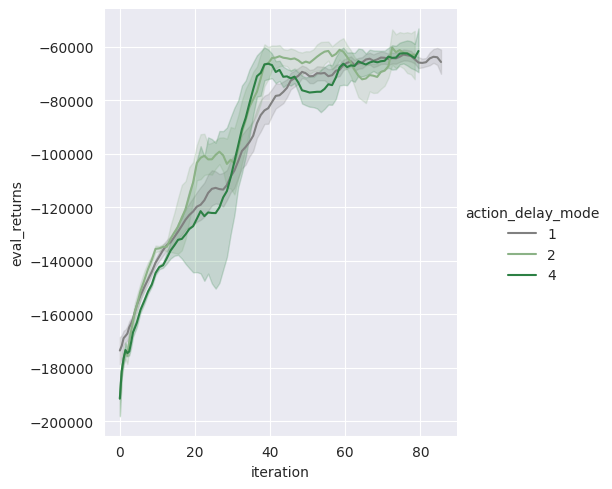

In [32]:
df_plot = (df_learning_data
 .reset_index(level=-1)
 .assign(trajectory_id=lambda df: df["level_2"] % n_eval_trajectory)
 .drop(columns=["level_2"])
 .reset_index()
 .groupby(["trajectory_id", "action_delay_mode", "run_id"])
 .rolling(window=10, min_periods=1)
 .mean()
 .reset_index()
 )

# Seaborn lineplot of eval returns
sns.relplot(data=df_plot,
            x="iteration",
            y="eval_returns",
            hue="action_delay_mode",
            # col="trajectory_id",
            kind="line",
            # no sharing of y axis rowwise
            facet_kws=dict(sharey=False),
            # reduce size of markers
            palette=list_color_palette,
            # s=3, 
            )

================== eig ==================


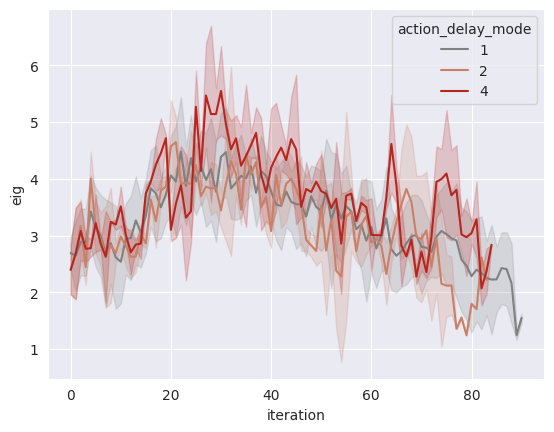

================== eval_returns ==================


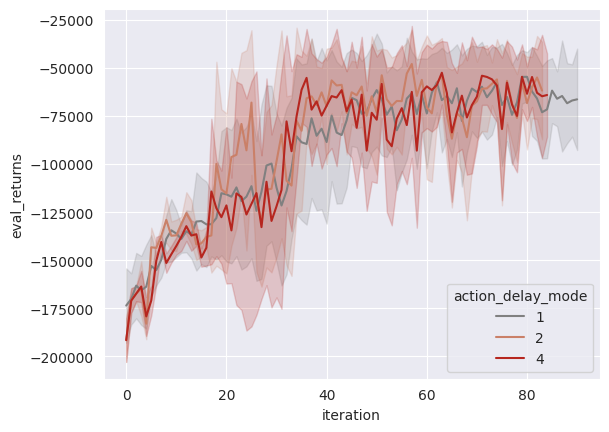

================== mean_difference_state_bootstrap ==================


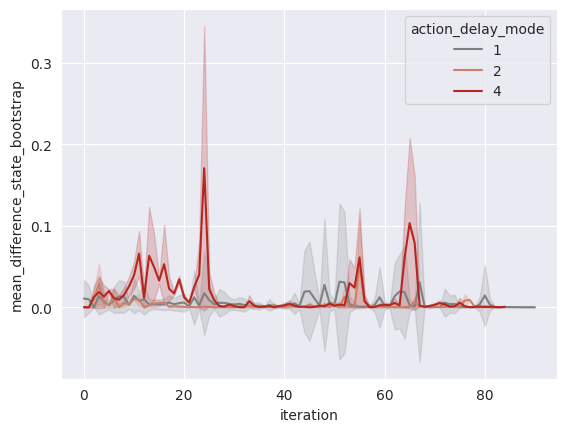

================== n_corresponding_dt ==================


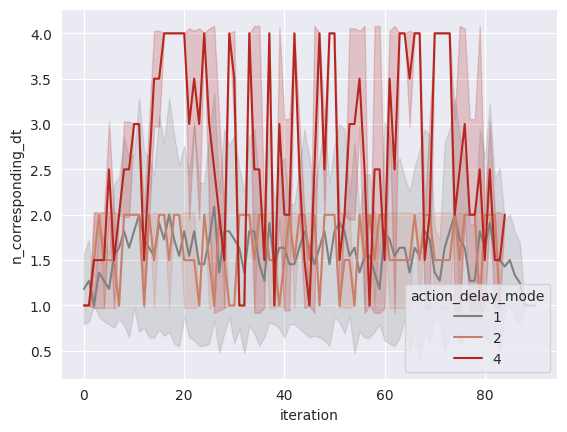

================== model_mse_current_real_mpc ==================


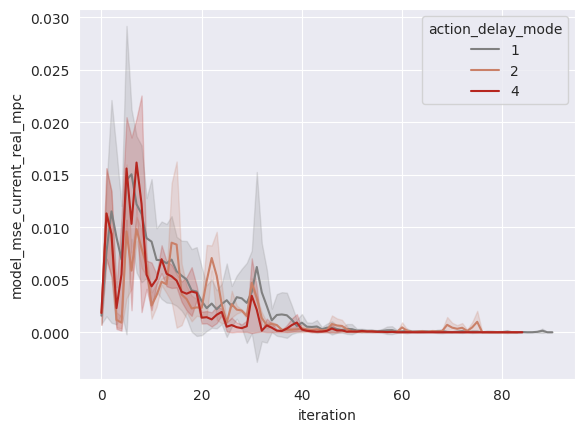

================== model_mse_random_test_set ==================


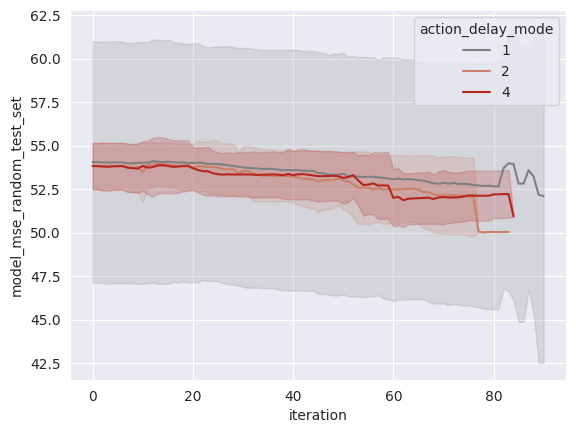

================== model_mse_gt_mpc ==================


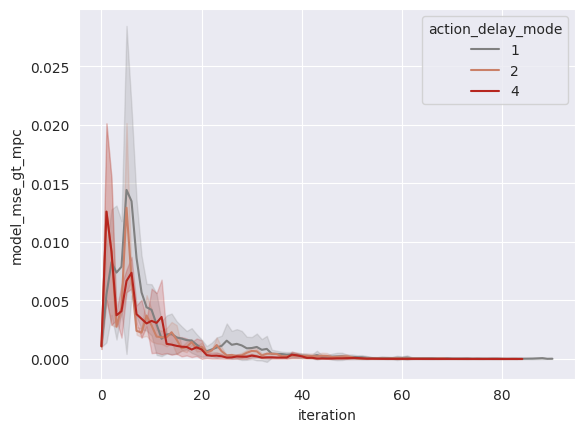

================== model_likelihood_random_test_set ==================


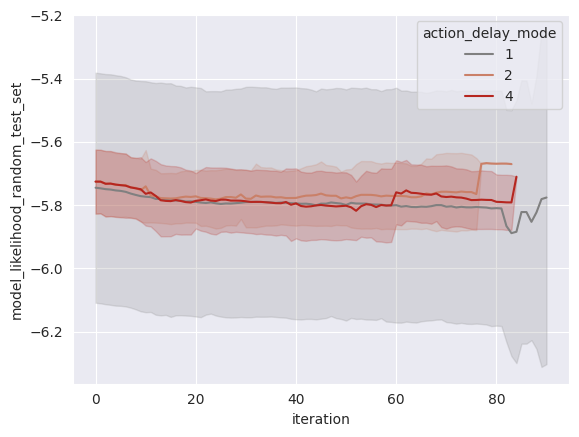

================== model_likelihood_gt_mpc ==================


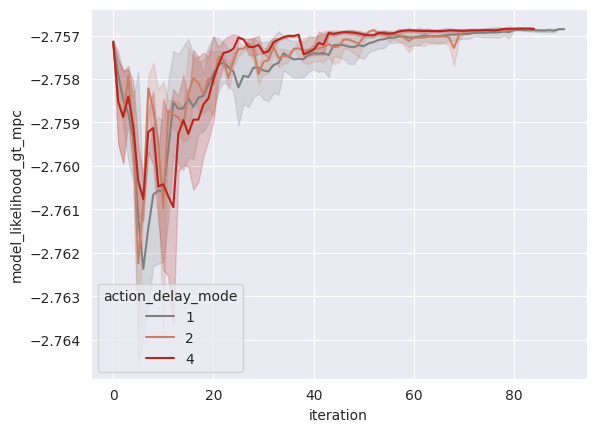

================== eval_ndata ==================


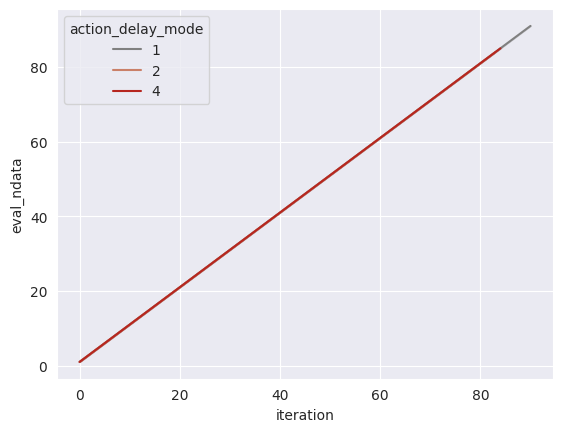

In [33]:
# Generate color palette with the first control experiment (no delay) being black while the others are Green but quite dark to be able to distinguish them
sns_other_palette = sns.color_palette("Reds", len(set(list_action_delay_mode)) - 1)
# Increase darkness of all colors in palette
coeff_darkness = 0.8
sns_other_palette = sns.color_palette([tuple(coeff_darkness * np.array(color)) for color in sns_other_palette])
list_color_palette = ["Grey"] + sns_other_palette
# list_color_palette = ["black"] + sns.color_palette("Greens", len(list_action_delay_mode) - 1).as_hex()
df_plot = df_learning_data.reset_index()

list_columns_plot = ["eig", "eval_returns", "mean_difference_state_bootstrap", "n_corresponding_dt",
                     "model_mse_current_real_mpc", "model_mse_random_test_set",
                     "model_mse_gt_mpc", "model_likelihood_random_test_set", "model_likelihood_gt_mpc", "eval_ndata"]

plt.close()
for name_column in list_columns_plot:
    print(f"================== {name_column} ==================")
    g = sns.lineplot(data=df_plot,
                     x="iteration",
                     y=name_column,
                     hue="action_delay_mode",
                     errorbar="sd",
                     legend="full",
                     palette=list_color_palette)
    plt.show()
    # Save the   figure
    # g.figure.savefig(f"/home/hosseinkhan/Downloads/temp_imgs/{name_column}.png")
    # plt.close()

In [34]:
dim_x = len(nested_dict_config[list_id_hash[0]]["env"]["gp"]["alpha"])
dim_u = len(nested_dict_config[list_id_hash[0]]["env"]["gp"]["ls"][0]) - dim_x

list_df_trajectory_data = []

for name_id in list_id_hash:
    path_pickle_data = f"{path_experiment}/{name_id}/barl_data/info.pkl"

    # Load the data
    with open(path_pickle_data, "rb") as file:
        dict_data = pickle.load(file)

    df_learning_data_temp = (
        pd.DataFrame({name_columns: dict_data[name_columns] for name_columns in list_name_columns_learning})
        .explode("Eval Returns")
        .reset_index(names=["iteration"])
        .rename(columns=dict_columns_learning_renaming_map)
    )

    df_trajectory_data_temp = (pd.concat(
        [pd.DataFrame(np.array(dict_data["x"])[:, :dim_x]), pd.DataFrame(np.array(dict_data["x"])[:, dim_x:])],
        axis="columns",
        keys=["state", "action"],
        names=["component", "i"]).assign(n_corresponding_dt=[0] + list(np.array(dict_data["n_corresponding_dt"])),
                                         iteration=[0] + list(np.array(dict_data["n_corresponding_dt"]).cumsum())
                                         )
                               )

    list_df_trajectory_data.append(df_trajectory_data_temp)

In [35]:
df_trajectory_data = pd.concat(list_df_trajectory_data, keys=list_keys_tuple_id_action_delay_mode,
                               names=["run_id", "action_delay_mode"])

In [36]:
df_trajectory_data

component                                                 state            \
i                                                             0         1   
run_id                           action_delay_mode                          
8e229eb80d9f47b9a1b9b4f975554904 1                 0  -0.083438 -0.085242   
                                                   1  -0.092689 -0.092429   
                                                   2  -0.101334 -0.105825   
                                                   3  -0.104157 -0.109069   
                                                   4  -0.097815 -0.094609   
...                                                         ...       ...   
452f7b0bf4544b1a944c4be57cfcf75f 1                 83 -0.040142 -0.067978   
                                                   84 -0.051441 -0.094411   
                                                   85 -0.091368 -0.154901   
                                                   86 -0.135357 -0.176485   
                                                   87 -0.135561 -0.129023   

component                                                          action  \
i                                                             2         0   
run_id                           action_delay_mode                          
8e229eb80d9f47b9a1b9b4f975554904 1                 0   0.270611  0.262116   
                                                   1   0.268140 -0.763557   
                                                   2   0.278052 -0.029680   
                                                   3   0.286486  0.650847   
                                                   4   0.289775 -0.900354   
...                                                         ...       ...   
452f7b0bf4544b1a944c4be57cfcf75f 1                 83  0.161767  0.632848   
                                                   84  0.154465  0.278076   
                                                   85  0.181153  0.869720   
                                                   86  0.303202  0.826756   
                                                   87  0.355984  0.237727   

component                                                                  \
i                                                             1         2   
run_id                           action_delay_mode                          
8e229eb80d9f47b9a1b9b4f975554904 1                 0  -0.615389 -0.064012   
                                                   1  -0.616576 -0.578705   
                                                   2  -0.975030 -0.939030   
                                                   3   0.471370 -0.966145   
                                                   4  -0.555748 -0.318510   
...                                                         ...       ...   
452f7b0bf4544b1a944c4be57cfcf75f 1                 83 -0.261828 -0.466149   
                                                   84  0.682851 -0.971120   
                                                   85  0.444885 -0.969808   
                                                   86  0.161777 -0.986491   
                                                   87  0.594907 -0.995326   

component                                             n_corresponding_dt  \
i                                                                          
run_id                           action_delay_mode                         
8e229eb80d9f47b9a1b9b4f975554904 1                 0                 0.0   
                                                   1                 2.0   
                                                   2                 2.0   
                                                   3                 1.0   
                                                   4                 1.0   
...                                                                  ...   
452f7b0bf4544b1a944c4be57cfcf75f 1                 83                2.0   
   

In [37]:
df_trajectory_data.describe()

component        state                                 action               \
i                    0            1            2            0            1   
count      1294.000000  1294.000000  1294.000000  1294.000000  1294.000000   
mean         -0.053457    -0.057031     0.220278     0.231191     0.344961   
std           0.060807     0.076254     0.091666     0.637989     0.643112   
min          -0.180616    -0.257081    -0.006627    -0.998024    -0.999841   
25%          -0.092561    -0.101801     0.158607    -0.316106    -0.121758   
50%          -0.065214    -0.065553     0.234381     0.444501     0.635303   
75%          -0.020491    -0.014432     0.279605     0.794964     0.876892   
max           0.173383     0.249145     0.448739     0.998381     0.999722   

component              n_corresponding_dt    iteration  
i                    2                                  
count      1294.000000        1294.000000  1294.000000  
mean         -0.502353           1.724884    73.478362  
std           0.578210           1.032368    54.533250  
min          -0.999982           0.000000     0.000000  
25%          -0.931158           1.000000    30.000000  
50%          -0.794236           1.000000    64.000000  
75%          -0.209147           2.000000   105.000000  
max           0.997900           4.000000   229.000000

In [38]:
df_trajectory_data["state", 0] *= 80
df_trajectory_data["state", 1] *= 8

df_trajectory_data["action", 0] *= 2


In [39]:
df_trajectory_data.describe()

component        state                                 action               \
i                    0            1            2            0            1   
count      1294.000000  1294.000000  1294.000000  1294.000000  1294.000000   
mean         -4.276549    -0.456245     0.220278     0.462383     0.344961   
std           4.864541     0.610032     0.091666     1.275977     0.643112   
min         -14.449270    -2.056645    -0.006627    -1.996047    -0.999841   
25%          -7.404884    -0.814407     0.158607    -0.632212    -0.121758   
50%          -5.217096    -0.524427     0.234381     0.889003     0.635303   
75%          -1.639304    -0.115455     0.279605     1.589929     0.876892   
max          13.870615     1.993162     0.448739     1.996761     0.999722   

component              n_corresponding_dt    iteration  
i                    2                                  
count      1294.000000        1294.000000  1294.000000  
mean         -0.502353           1.724884    73.478362  
std           0.578210           1.032368    54.533250  
min          -0.999982           0.000000     0.000000  
25%          -0.931158           1.000000    30.000000  
50%          -0.794236           1.000000    64.000000  
75%          -0.209147           2.000000   105.000000  
max           0.997900           4.000000   229.000000

In [40]:
(df_trajectory_data
 .set_index(["n_corresponding_dt", "iteration"], append=True)
 .stack(level=["component", "i"])
 .rename("system_value")
 .reset_index()
 .drop(columns="level_2"))

run_id  action_delay_mode  n_corresponding_dt  \
0     8e229eb80d9f47b9a1b9b4f975554904                  1                 0.0   
1     8e229eb80d9f47b9a1b9b4f975554904                  1                 0.0   
2     8e229eb80d9f47b9a1b9b4f975554904                  1                 0.0   
3     8e229eb80d9f47b9a1b9b4f975554904                  1                 0.0   
4     8e229eb80d9f47b9a1b9b4f975554904                  1                 0.0   
...                                ...                ...                 ...   
7759  452f7b0bf4544b1a944c4be57cfcf75f                  1                 1.0   
7760  452f7b0bf4544b1a944c4be57cfcf75f                  1                 1.0   
7761  452f7b0bf4544b1a944c4be57cfcf75f                  1                 1.0   
7762  452f7b0bf4544b1a944c4be57cfcf75f                  1                 1.0   
7763  452f7b0bf4544b1a944c4be57cfcf75f                  1                 1.0   

      iteration component  i  system_value  
0           0.0    action  0      0.524233  
1           0.0    action  1     -0.615389  
2           0.0    action  2     -0.064012  
3           0.0     state  0     -6.675052  
4           0.0     state  1     -0.681932  
...         ...       ... ..           ...  
7759      137.0    action  1      0.594907  
7760      137.0    action  2     -0.995326  
7761      137.0     state  0    -10.844872  
7762      137.0     state  1     -1.032186  
7763      137.0     state  2      0.355984  

[7764 rows x 7 columns]

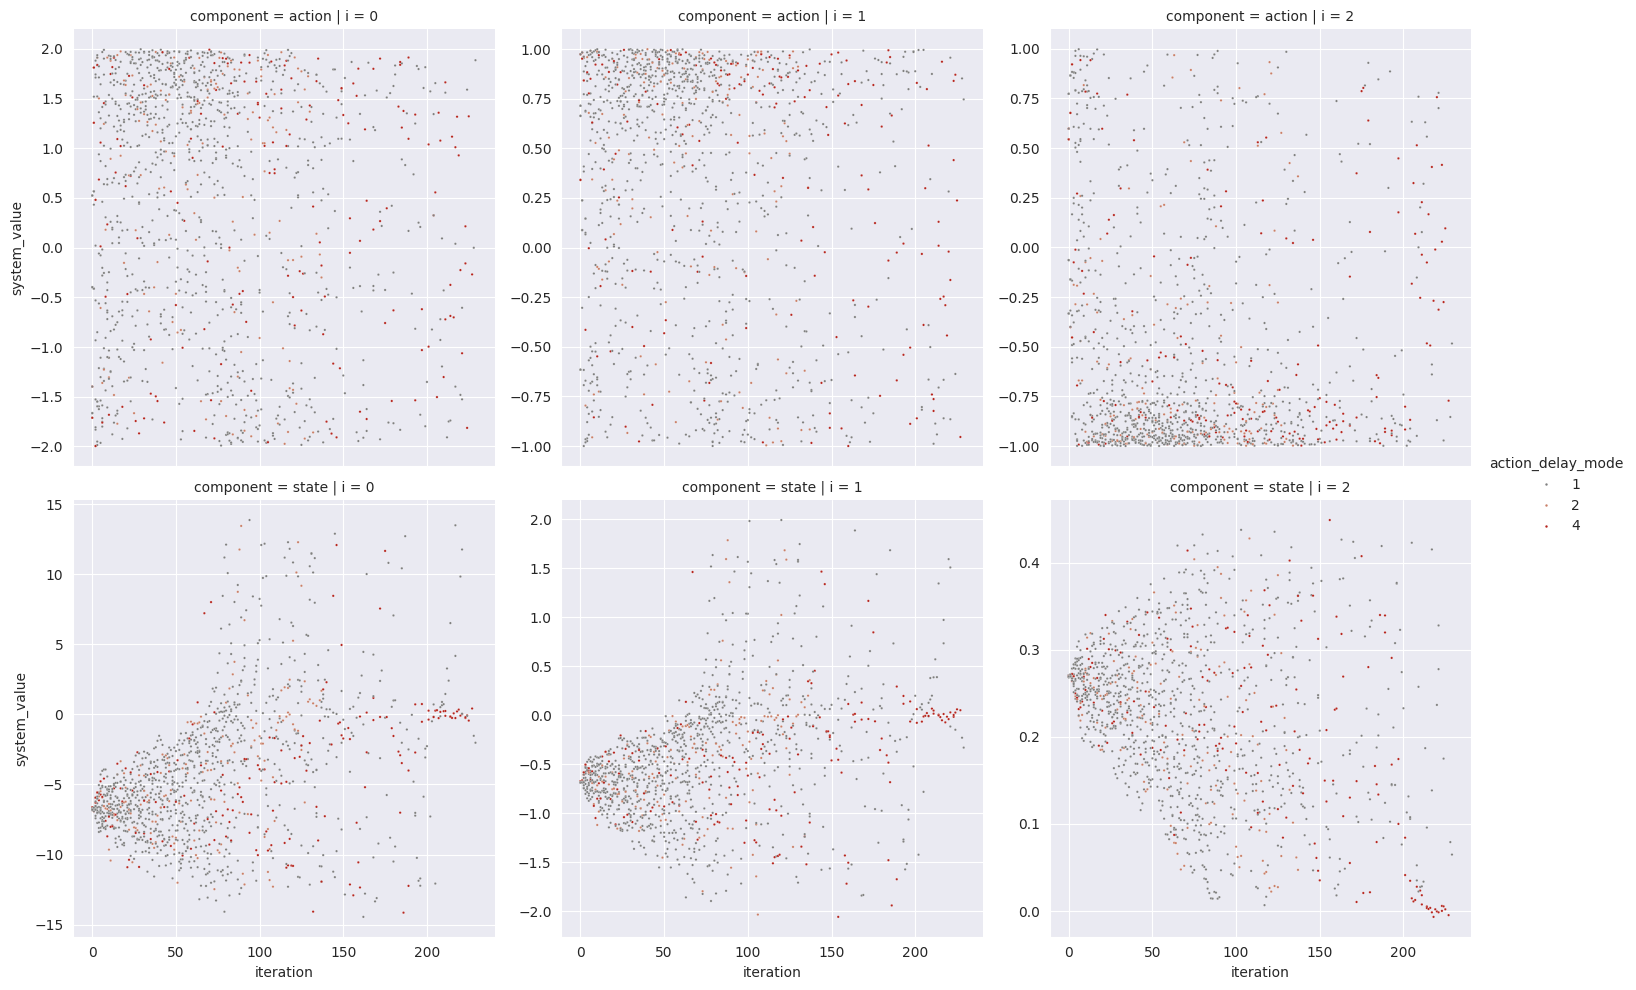

In [41]:
df_temp = (df_trajectory_data
           .set_index(["n_corresponding_dt", "iteration"], append=True)
           .stack(level=["component", "i"])
           .rename("system_value")
           .reset_index()
           .drop(columns="level_2"))

sns.relplot(data=df_temp,
            x="iteration",
            y="system_value",
            hue="action_delay_mode",
            col="i",
            row="component",
            # kind="line",
            # no sharing of y axis rowwise
            facet_kws=dict(sharey=False),
            # reduce size of markers
            palette=list_color_palette,
            s=3, )

##### Action distribution along time

/tmp/ipykernel_131463/1998059645.py:2: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  df_temp = (df_trajectory_data


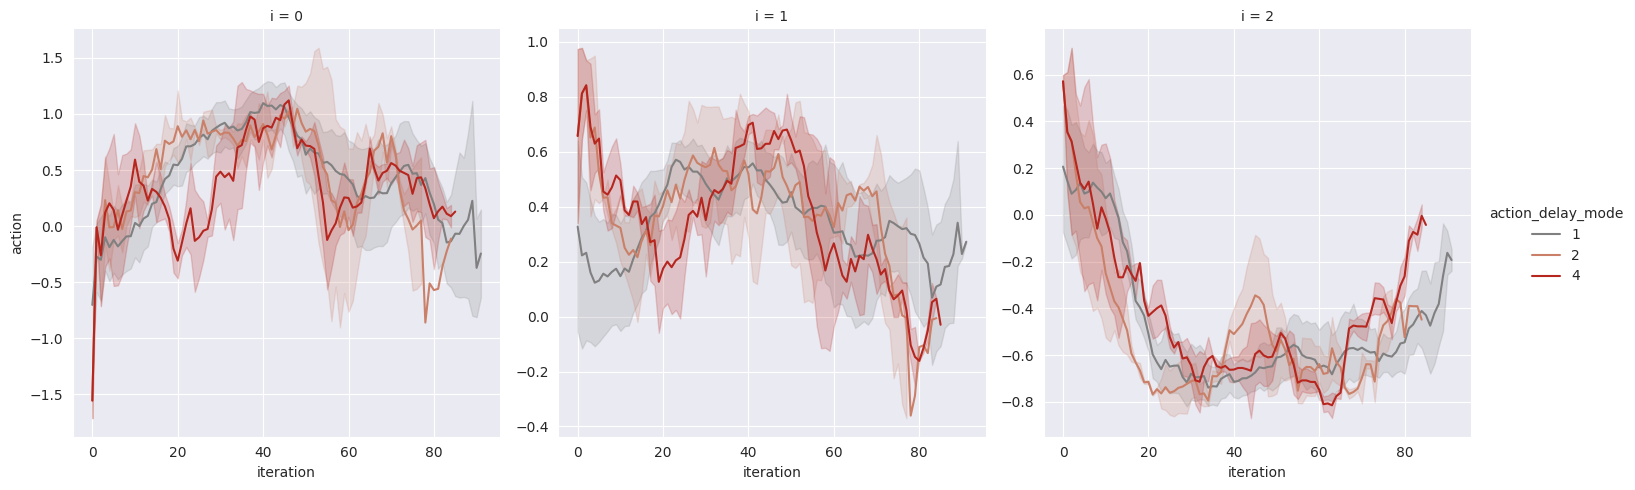

In [42]:
window_size = 10
df_temp = (df_trajectory_data
           .loc[pd.IndexSlice[:, :, :], ["action"]]
           .groupby(["run_id", "action_delay_mode"], as_index=False)
           .rolling(window=window_size, min_periods=1)
           .mean()
           .drop(columns=["run_id", "action_delay_mode"])
           .stack(level=-1)
           .reset_index()
           .rename(columns={"level_2": "iteration"}))

# Plot the time series
sns.relplot(data=df_temp,
            x="iteration",
            y="action",
            hue="action_delay_mode",
            col="i",
            kind="line",
            # no sharing of y axis rowwise
            facet_kws=dict(sharey=False),
            # reduce size of markers
            palette=list_color_palette,
            # s=3,
            )

In [43]:
(df_trajectory_data
 .set_index(["n_corresponding_dt", "iteration"], append=True)
 .stack(level=["component", "i"])
 .rename("system_value")
 .reset_index()
 .drop(columns="level_2"))

run_id  action_delay_mode  n_corresponding_dt  \
0     8e229eb80d9f47b9a1b9b4f975554904                  1                 0.0   
1     8e229eb80d9f47b9a1b9b4f975554904                  1                 0.0   
2     8e229eb80d9f47b9a1b9b4f975554904                  1                 0.0   
3     8e229eb80d9f47b9a1b9b4f975554904                  1                 0.0   
4     8e229eb80d9f47b9a1b9b4f975554904                  1                 0.0   
...                                ...                ...                 ...   
7759  452f7b0bf4544b1a944c4be57cfcf75f                  1                 1.0   
7760  452f7b0bf4544b1a944c4be57cfcf75f                  1                 1.0   
7761  452f7b0bf4544b1a944c4be57cfcf75f                  1                 1.0   
7762  452f7b0bf4544b1a944c4be57cfcf75f                  1                 1.0   
7763  452f7b0bf4544b1a944c4be57cfcf75f                  1                 1.0   

      iteration component  i  system_value  
0           0.0    action  0      0.524233  
1           0.0    action  1     -0.615389  
2           0.0    action  2     -0.064012  
3           0.0     state  0     -6.675052  
4           0.0     state  1     -0.681932  
...         ...       ... ..           ...  
7759      137.0    action  1      0.594907  
7760      137.0    action  2     -0.995326  
7761      137.0     state  0    -10.844872  
7762      137.0     state  1     -1.032186  
7763      137.0     state  2      0.355984  

[7764 rows x 7 columns]

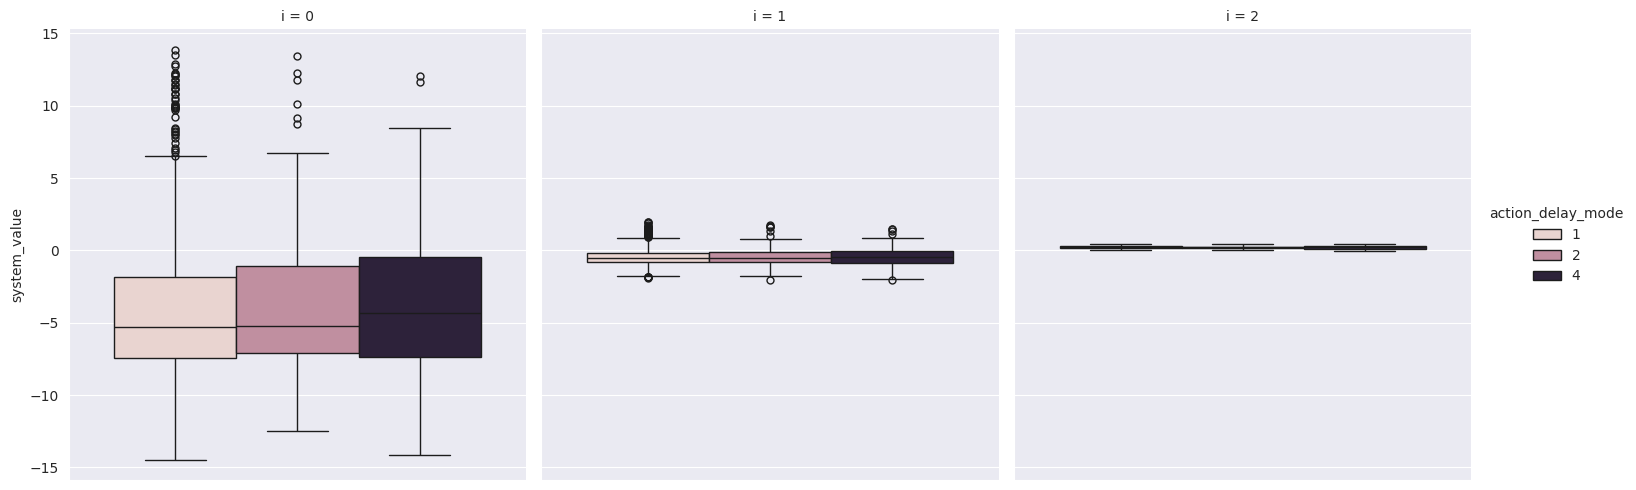

In [44]:
df_temp = (df_trajectory_data
.set_index(["n_corresponding_dt", "iteration"], append=True)
.stack(level=["component", "i"])
.rename("system_value")
.reset_index()
.drop(columns="level_2")
# Extract only the state
.loc[lambda df: df["component"] == "state"]
)

# Plot the statistics with boxplot
sns.catplot(data=df_temp,
            col="i",
            y="system_value",
            hue="action_delay_mode",
            # col="i",
            # col="component",
            # row="statistic",
            # kind="line",
            # no sharing of y axis rowwise
            # sharey=False,
            # facet_kws=dict(sharey=False),
            # common_bins=False,
            kind="box",
            # bins=50
            # reduce size of markers
            # s=3,
            )